In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\ElectricCarData_Norm.csv")
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [3]:
exchange_rate = 90.6 
df['PriceINR'] = df['PriceEuro'] * exchange_rate
df['RapidCharge'].replace(to_replace=['Rapid charging not possible','Rapid charging possible'],value=[0, 1],inplace=True)
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,PriceINR
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,1,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480,5026488.0
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,1,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000,2718000.0
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,1,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440,5113464.0
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,1,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040,6164424.0
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,1,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997,2989528.2


In [4]:
# List of columns with units
columns_with_units = ['Accel', 'TopSpeed', 'Efficiency', 'FastCharge','Range']

# Removing units from specific columns
for col in columns_with_units:
    df[col] = pd.to_numeric(df[col].replace('[^0-9.]', '', regex=True), errors='coerce')

df.head()


,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,PriceINR
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940.0,1,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480,5026488.0
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250.0,1,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000,2718000.0
2,Polestar,2,4.7,210,400,181,620.0,1,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440,5113464.0
3,BMW,iX3,6.8,180,360,206,560.0,1,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040,6164424.0
4,Honda,e,9.5,145,170,168,190.0,1,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997,2989528.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        103 non-null    object 
 1   Model        103 non-null    object 
 2   Accel        103 non-null    float64
 3   TopSpeed     103 non-null    int64  
 4   Range        103 non-null    int64  
 5   Efficiency   103 non-null    int64  
 6   FastCharge   98 non-null     float64
 7   RapidCharge  103 non-null    int64  
 8   PowerTrain   103 non-null    object 
 9   PlugType     103 non-null    object 
 10  BodyStyle    103 non-null    object 
 11  Segment      103 non-null    object 
 12  Seats        103 non-null    int64  
 13  PriceEuro    103 non-null    int64  
 14  PriceINR     103 non-null    float64
dtypes: float64(3), int64(6), object(6)
memory usage: 12.2+ KB


In [6]:
df.describe()

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,Seats,PriceEuro,PriceINR
count,103.000000,103.000000,103.000000,103.000000,98.000000,103.000000,103.000000,103.000000,1.030000e+02
mean,7.396117,179.194175,338.786408,189.165049,456.734694,0.951456,4.883495,55811.563107,5.056528e+06
std,3.017430,43.573030,126.014444,29.566839,201.262897,0.215963,0.795834,34134.665280,3.092601e+06
min,2.100000,123.000000,95.000000,104.000000,170.000000,0.000000,2.000000,20129.000000,1.823687e+06
25%,5.100000,150.000000,250.000000,168.000000,275.000000,1.000000,5.000000,34429.500000,3.119313e+06
50%,7.300000,160.000000,340.000000,180.000000,440.000000,1.000000,5.000000,45000.000000,4.077000e+06
75%,9.000000,200.000000,400.000000,203.000000,560.000000,1.000000,5.000000,65000.000000,5.889000e+06
max,22.400000,410.000000,970.000000,273.000000,940.000000,1.000000,7.000000,215000.000000,1.947900e+07


In [7]:
df['FastCharge'].fillna(0, inplace=True)

df.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
PriceINR       0
dtype: int64

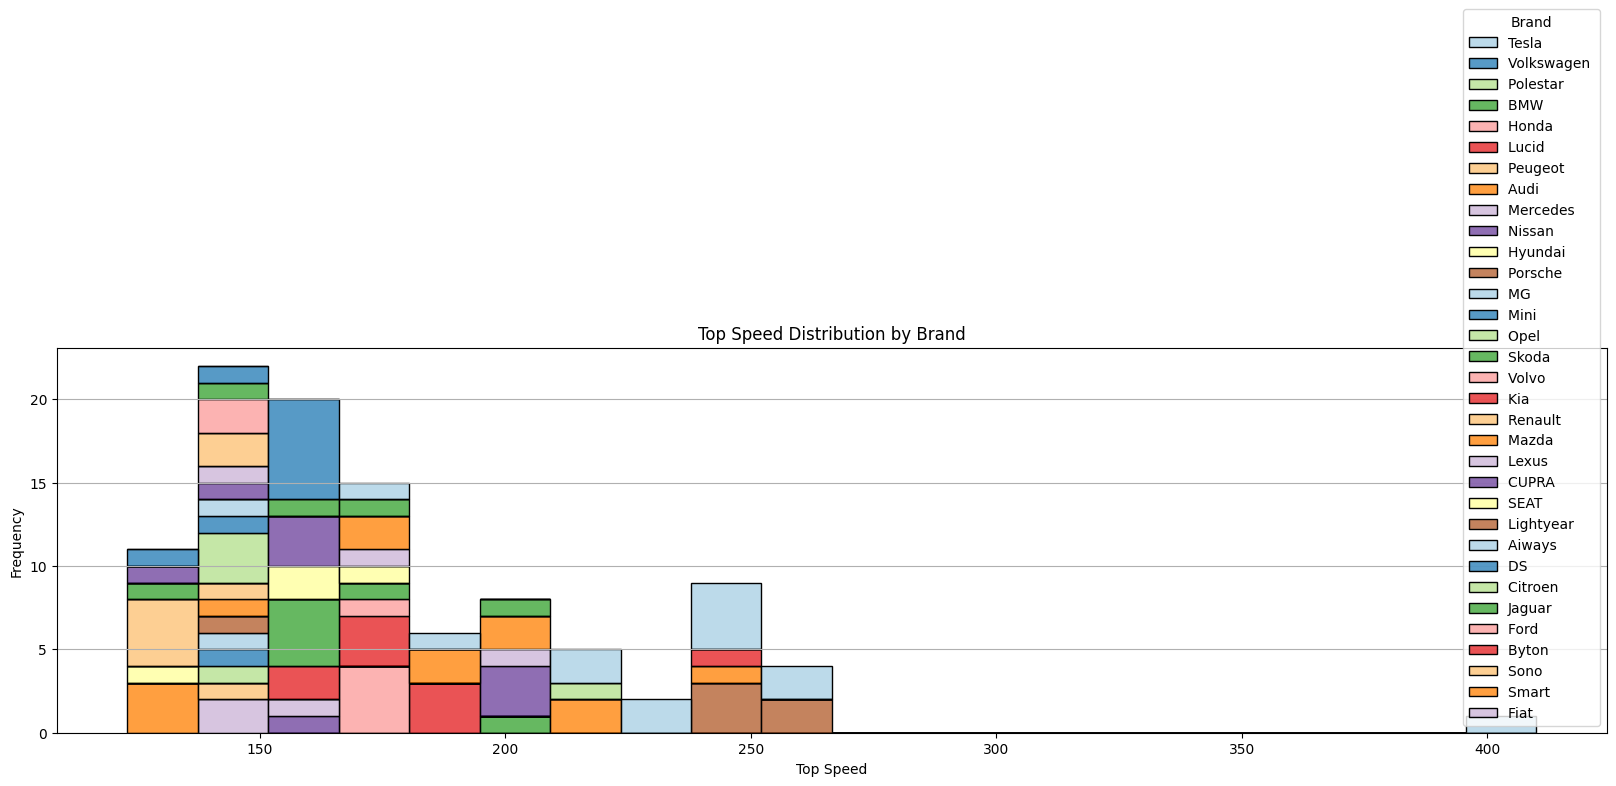

In [8]:
plt.figure(figsize=(20, 5))
sns.histplot(df, x='TopSpeed', hue='Brand', multiple='stack', palette='Paired', bins=20)
plt.grid(axis='y')
plt.title('Top Speed Distribution by Brand')
plt.xlabel('Top Speed')
plt.ylabel('Frequency')
plt.show()

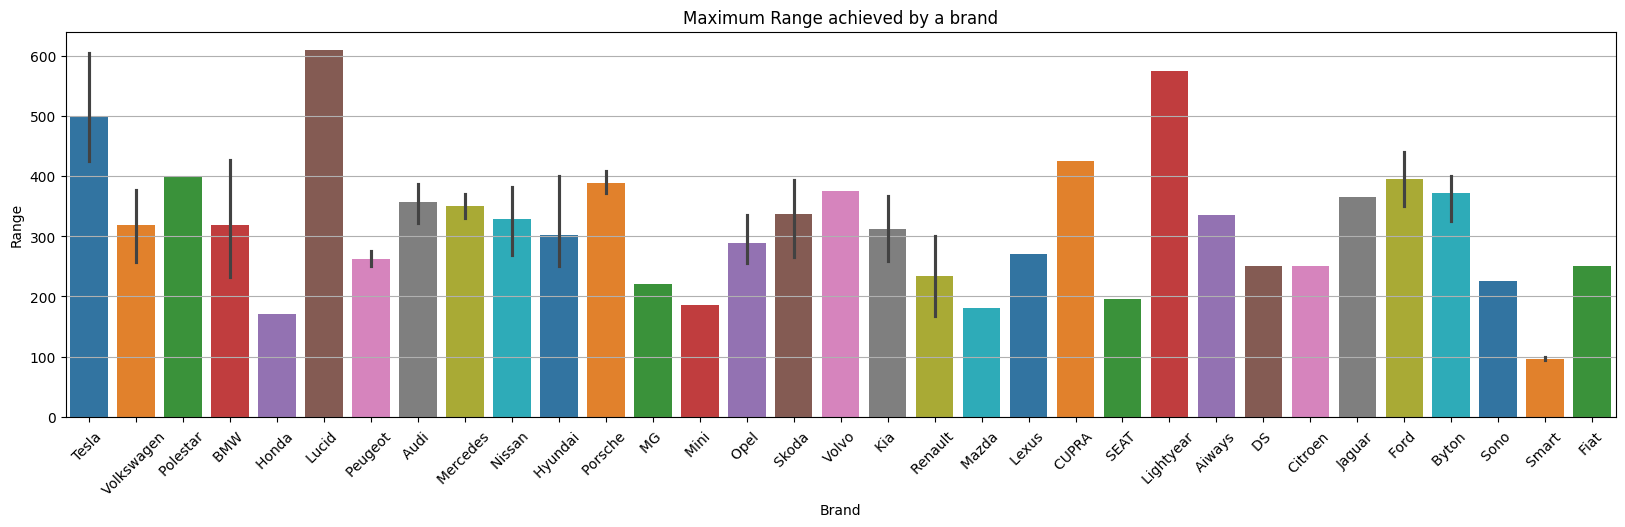

In [9]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(x='Brand', y='Range', data=df, palette='tab10', hue='Brand')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

# Show the plot
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32

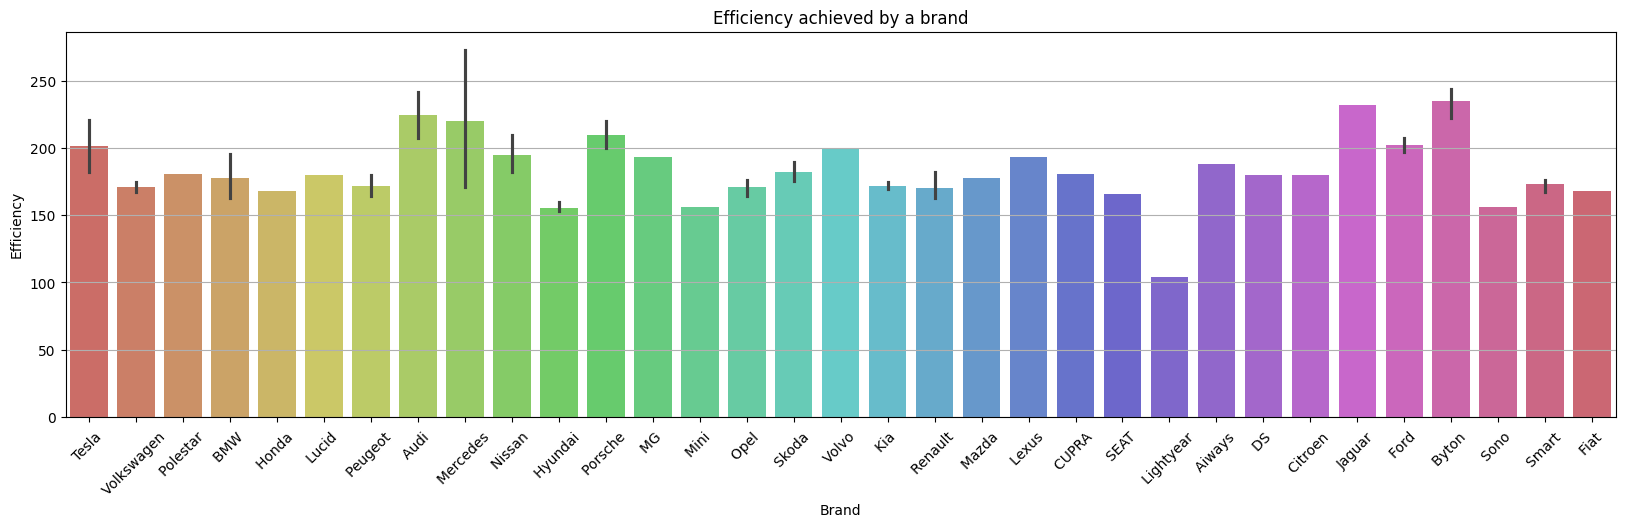

In [10]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y="Efficiency",data=df,palette='hls', hue='Brand', legend=False)
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

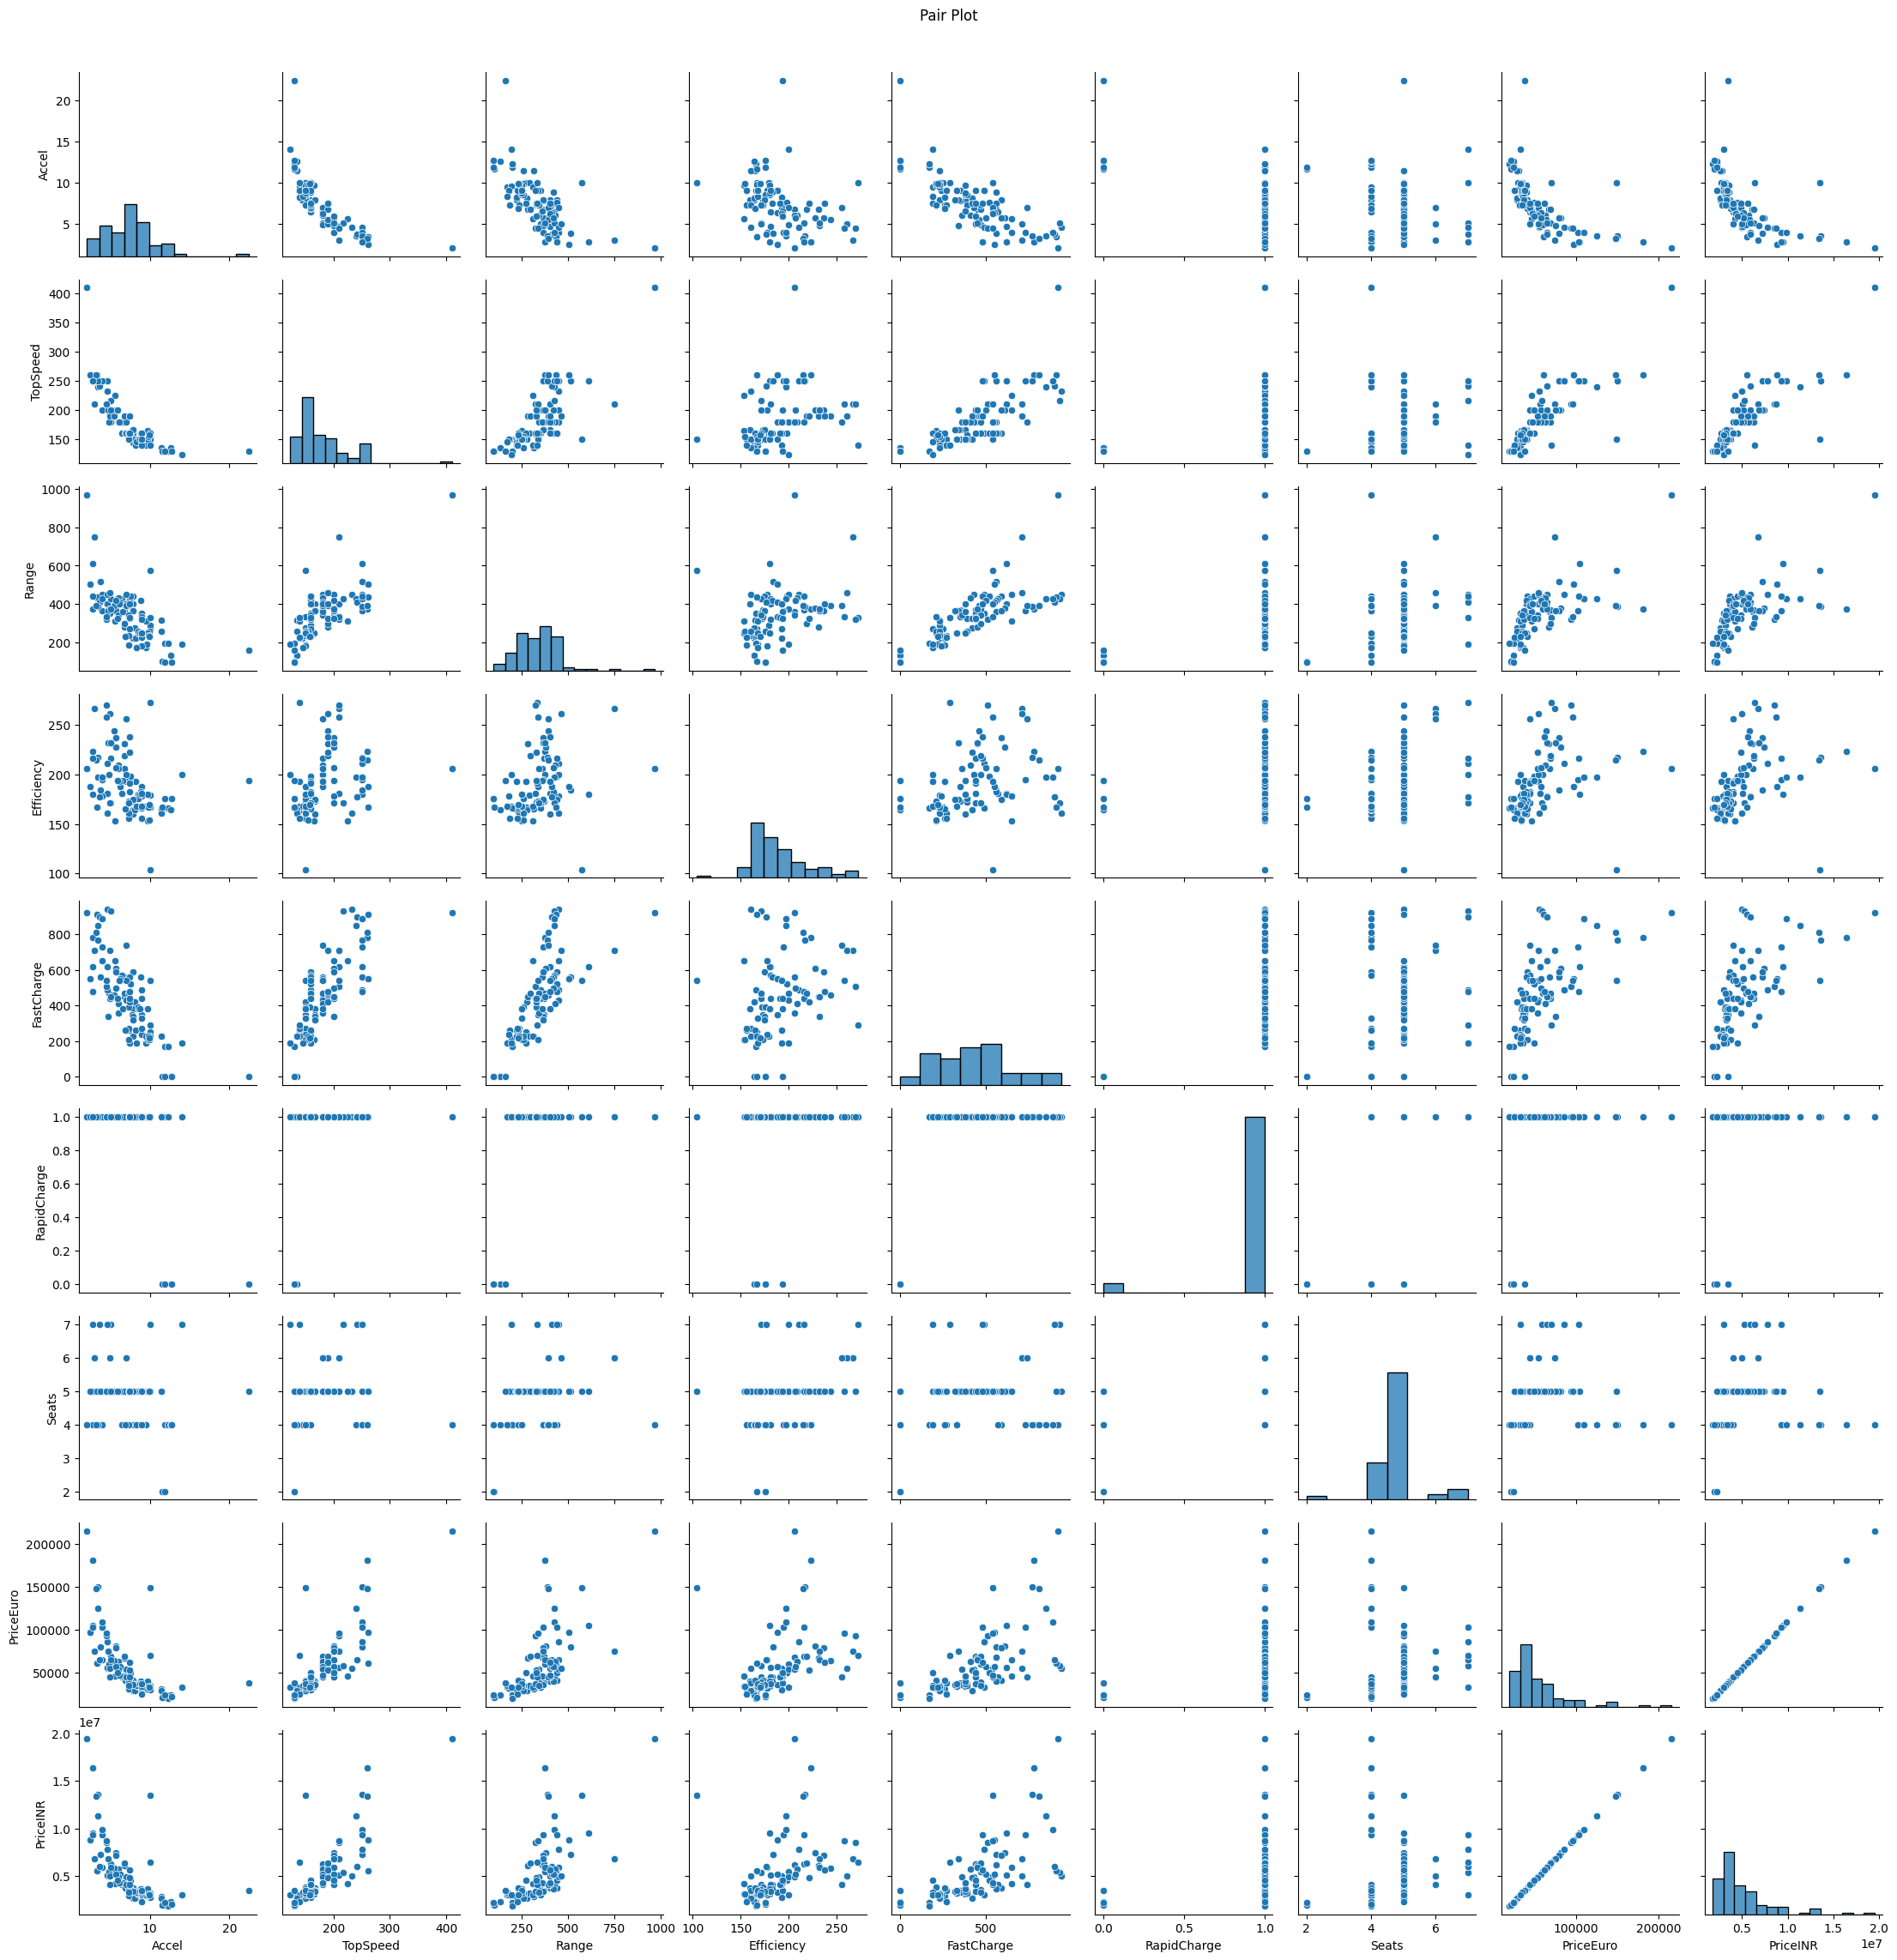

In [11]:
selected_columns = ['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'RapidCharge', 'Seats', 'PriceEuro', 'PriceINR']

# Creating the pair plot
sns.pairplot(df[selected_columns])
plt.suptitle("Pair Plot", y=1.02)
plt.show()

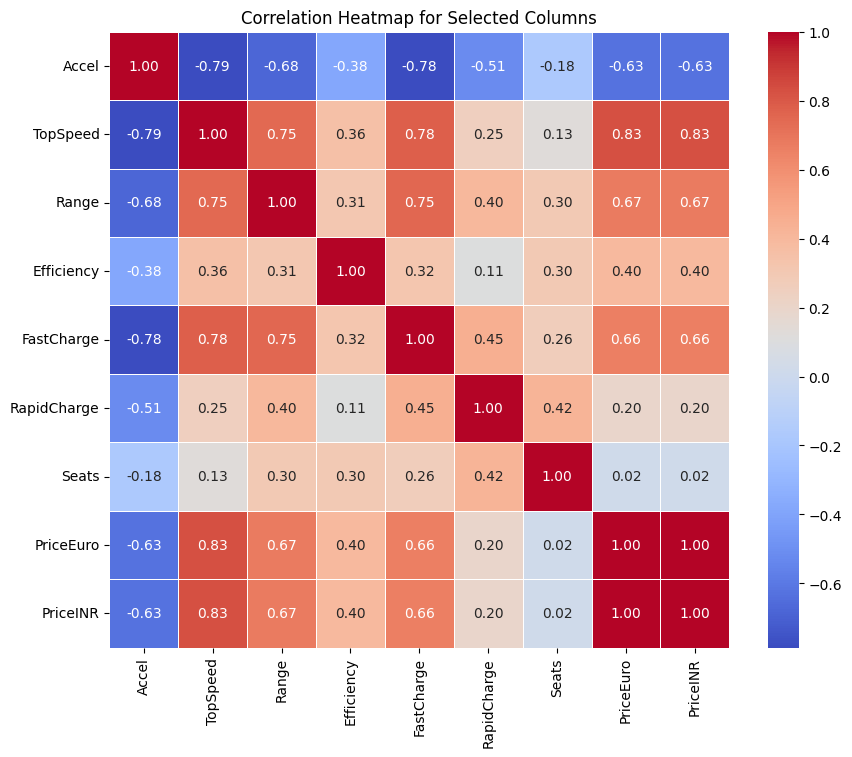

In [12]:
correlation_matrix = df[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap for Selected Columns")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25404\133046272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Seats', data=df, palette='viridis', order=df['Seats'].value_counts().index)


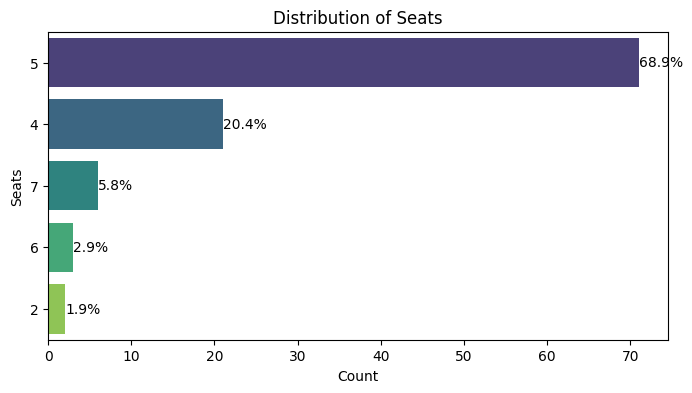

In [13]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(y='Seats', data=df, palette='viridis', order=df['Seats'].value_counts().index)

total = len(df['Seats'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.text(x, y, percentage, ha='left', va='center')

plt.title('Distribution of Seats')
plt.xlabel('Count')
plt.ylabel('Seats')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25404\1254832367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='PlugType', data=df, palette='viridis', order=df['PlugType'].value_counts().index


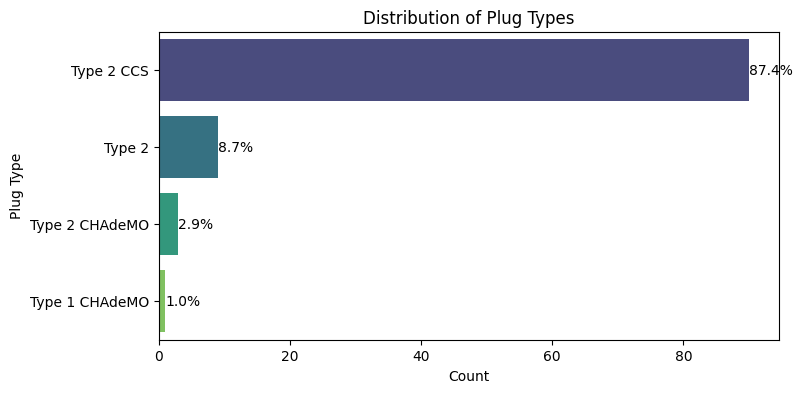

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(y='PlugType', data=df, palette='viridis', order=df['PlugType'].value_counts().index
              ).set(title='Distribution of Plug Types', xlabel='Count', ylabel='Plug Type')

total = len(df['PlugType'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    plt.gca().text(x, y, percentage, ha='left', va='center')
    
plt.show()

Text(0.5, 1.0, 'Body Style')

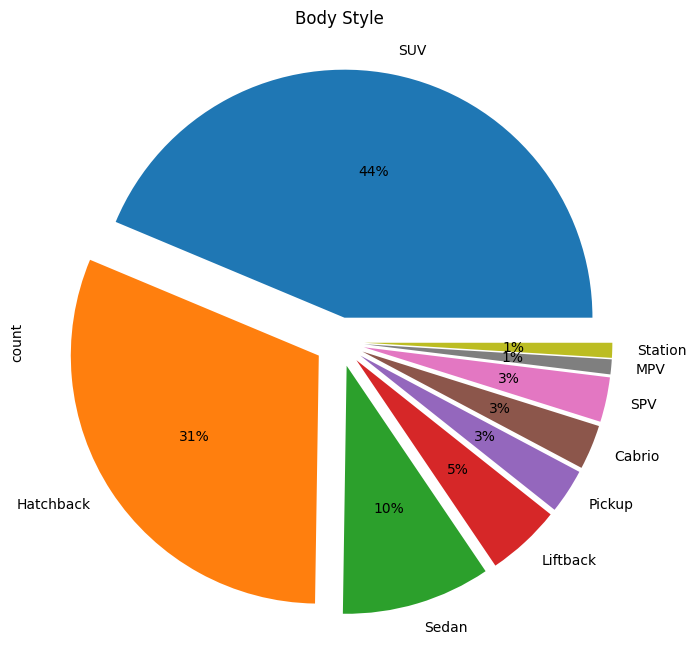

In [15]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')   

Text(0.5, 1.0, 'Segment')

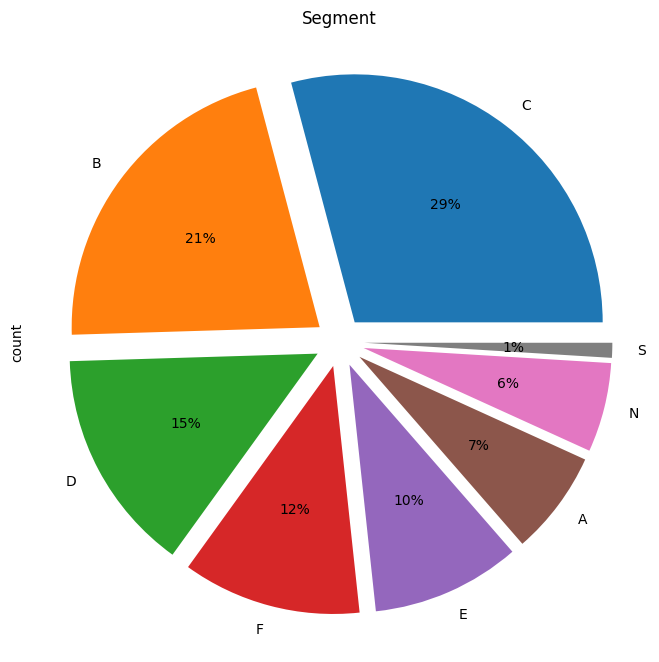

In [16]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

In [17]:
df["Range"] = df["Range"].astype(str).str.extract('(\d+)').astype(np.float64)

In [18]:
df["TopSpeed"].fillna("Missing", inplace=True)

# Converting "Range," "Accel," and "FastCharge" columns to numeric
numeric_columns = ["Range", "Accel", "FastCharge"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df3 = df.groupby("TopSpeed").size().reset_index(name='Count')
df4 = df.groupby("Range").size().reset_index(name='Count')
df5 = df.groupby(["Range", "TopSpeed"]).size().reset_index(name='Count')

print("DataFrame 3:")
print(df3.head())
print("\nDataFrame 4:")
print(df4.head())
print("\nDataFrame 5:")
print(df5.head())

DataFrame 3:
   TopSpeed  Count
0       123      1
1       130      7
2       135      3
3       140      4
4       144      1

DataFrame 4:
   Range  Count
0   95.0      2
1  100.0      1
2  130.0      1
3  160.0      1
4  170.0      2

DataFrame 5:
   Range  TopSpeed  Count
0   95.0       130      2
1  100.0       130      1
2  130.0       135      1
3  160.0       130      1
4  170.0       145      2


In [19]:
df5.head(10)

,Range,TopSpeed,Count
0,95.0,130,2
1,100.0,130,1
2,130.0,135,1
3,160.0,130,1
4,170.0,145,2
5,180.0,150,1
6,185.0,150,1
7,190.0,123,1
8,190.0,150,1
9,195.0,130,3


## PCA Analysis

In [20]:
features = ['Accel','TopSpeed','Efficiency','FastCharge', 'RapidCharge','Range', 'Seats', 'PriceINR']
from sklearn.preprocessing import StandardScaler
x = df.loc[:, features].values
x_standardized = StandardScaler().fit_transform(x)   

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principal_components = pca.fit_transform(x_standardized)
data_pca = pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, 9)])
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.118016,0.244255,-1.430547,0.759397,-1.319033,0.071498,-0.713288,-0.326257
1,-1.528982,-0.587461,-0.450122,0.182961,0.294766,-0.139906,0.159079,-0.358488
2,1.262657,0.031005,-0.595544,0.131253,-0.660926,-0.030726,0.101642,-0.060218
3,0.758496,-0.128263,0.320195,-0.206427,0.003949,0.074760,-0.407353,0.137331
4,-2.211034,0.244843,-0.644147,-0.910628,0.342095,-0.302337,0.037561,-0.193960
...,...,...,...,...,...,...,...,...
98,-0.250036,-0.459912,-0.021948,-0.173428,-0.086265,0.186262,-0.124875,0.134913
99,1.989282,0.211116,1.778367,-1.128999,0.143838,-0.369675,-0.105644,0.100670
100,0.431311,-0.161516,-0.008665,-0.258134,-0.321145,-0.262346,0.333194,-0.241505
101,1.201606,-0.102469,1.026250,-0.714663,-0.083723,0.108249,0.352792,-0.084532


In [22]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)

array([ 55.19,  71.2 ,  82.69,  89.26,  93.14,  96.36,  98.8 , 100.  ])

In [23]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(np.round(explained_variance_ratio, decimals=4) * 100)

In [24]:
print("Explained Variance Ratio:")
print(f"PC1: {explained_variance_ratio[0]*100:.2f}%")
print(f"PC2: {explained_variance_ratio[1]*100:.2f}%")

print("\nCumulative Explained Variance:")
print(f"PC1 and PC2: {cumulative_explained_variance[1]:.2f}%")


Explained Variance Ratio:
PC1: 55.19%
PC2: 16.01%

Cumulative Explained Variance:
PC1 and PC2: 71.20%


In [25]:
print(pca.explained_variance_ratio_)


[0.55192058 0.1601304  0.11486505 0.06571951 0.03877875 0.0321553
 0.02441215 0.01201825]


In [26]:
df_9=data_pca.iloc[:,:9]
df_9.head(3)   

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.118016,0.244255,-1.430547,0.759397,-1.319033,0.071498,-0.713288,-0.326257
1,-1.528982,-0.587461,-0.450122,0.182961,0.294766,-0.139906,0.159079,-0.358488
2,1.262657,0.031005,-0.595544,0.131253,-0.660926,-0.030726,0.101642,-0.060218


In [27]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame(loadings.T, columns=pc_list, index=df_9.columns)
print(loadings_df)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
PC1 -0.420024 -0.027310  0.141618  0.352962  0.459592  0.126448 -0.483238   
PC2  0.426035  0.261879 -0.013849  0.161122 -0.081458 -0.343575  0.263465   
PC3  0.235646 -0.082153  0.832618 -0.427634  0.021775  0.199517 -0.074329   
PC4  0.425276  0.015965 -0.149802  0.081485 -0.441753  0.074080 -0.767478   
PC5  0.248291 -0.540312 -0.427767 -0.496273  0.402495 -0.006801 -0.078704   
PC6  0.411116  0.010075 -0.088184  0.368603  0.199002  0.766117  0.244281   
PC7  0.160095 -0.715113  0.255669  0.519568 -0.061701 -0.314150  0.086407   
PC8  0.386511  0.346762  0.089056  0.088552  0.617340 -0.367424 -0.170840   

          PC8  
PC1 -0.466329  
PC2 -0.727783  
PC3 -0.125668  
PC4  0.012223  
PC5 -0.221134  
PC6  0.032056  
PC7  0.133049  
PC8  0.411457  


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
variable,,,,,,,,
PC1,-0.420024,-0.027310,0.141618,0.352962,0.459592,0.126448,-0.483238,-0.466329
PC2,0.426035,0.261879,-0.013849,0.161122,-0.081458,-0.343575,0.263465,-0.727783
PC3,0.235646,-0.082153,0.832618,-0.427634,0.021775,0.199517,-0.074329,-0.125668
PC4,0.425276,0.015965,-0.149802,0.081485,-0.441753,0.074080,-0.767478,0.012223
PC5,0.248291,-0.540312,-0.427767,-0.496273,0.402495,-0.006801,-0.078704,-0.221134
PC6,0.411116,0.010075,-0.088184,0.368603,0.199002,0.766117,0.244281,0.032056
PC7,0.160095,-0.715113,0.255669,0.519568,-0.061701,-0.314150,0.086407,0.133049
PC8,0.386511,0.346762,0.089056,0.088552,0.617340,-0.367424,-0.170840,0.411457


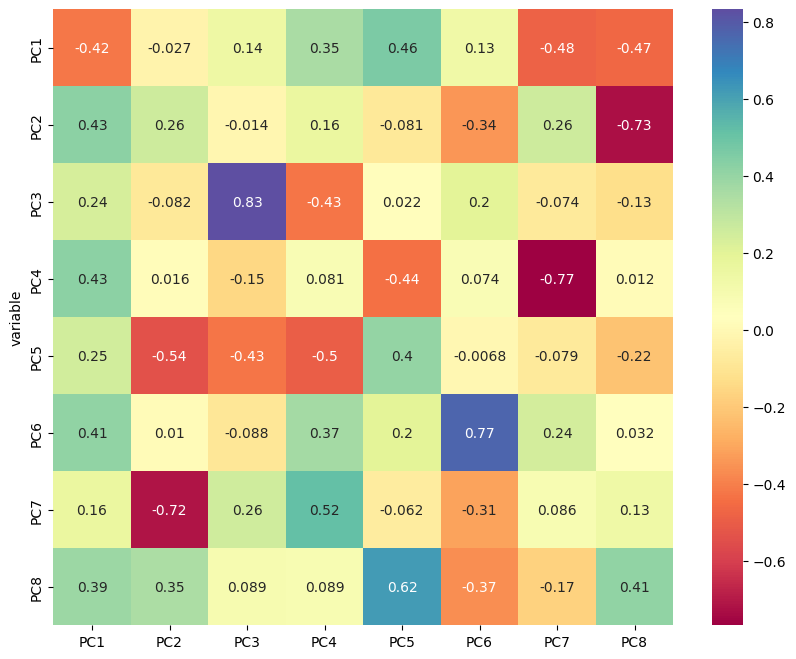

In [30]:
plt.rcParams['figure.figsize'] = (10,8)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()


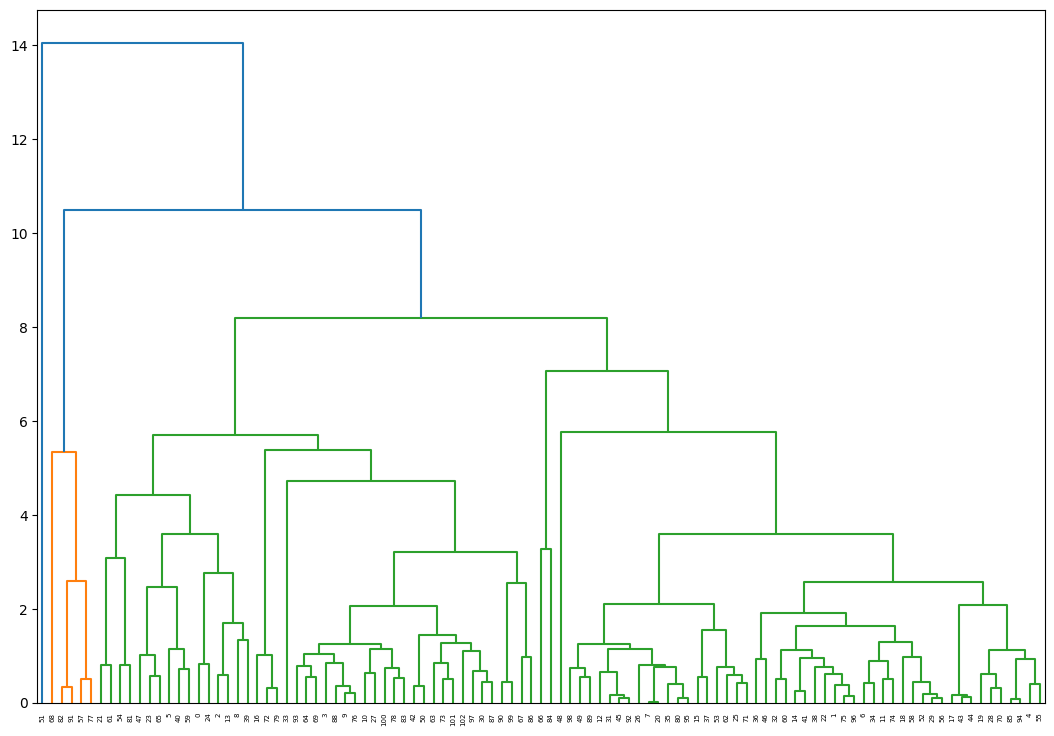

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data_pca, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

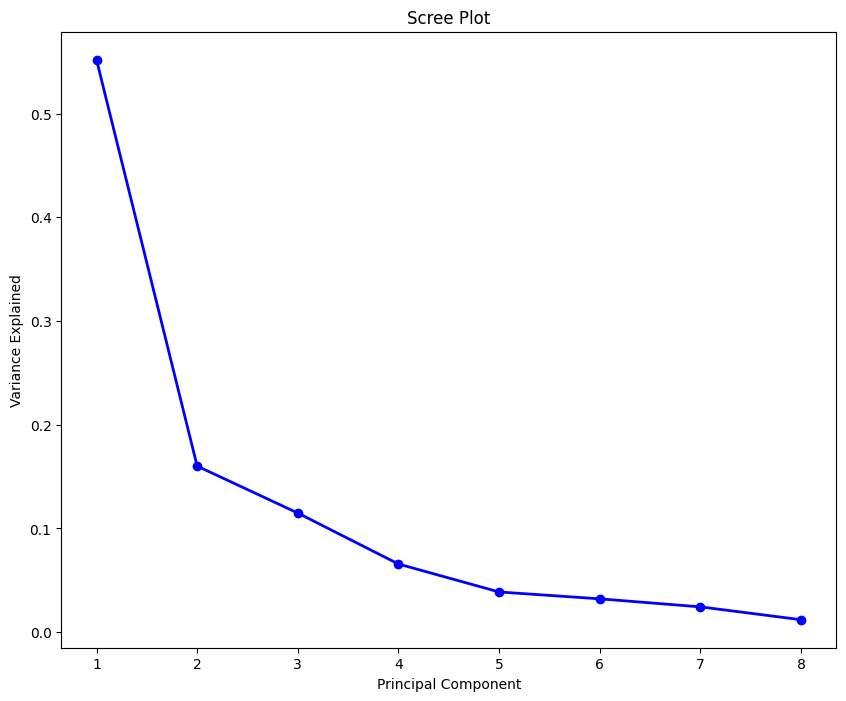

In [32]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## KMeans Cluster Analysis

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

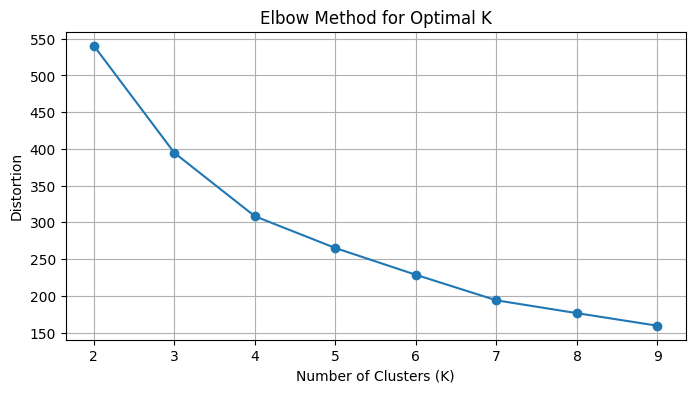

In [34]:
from sklearn.cluster import KMeans
distortions = []
K_range = range(2, 10)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=40)
    model.fit(principal_components)
    distortions.append(model.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

In [35]:
k_value = 4  
model_for_k_value = KMeans(n_clusters=k_value, random_state=40, n_init=10)
model_for_k_value.fit(principal_components)
distortion_for_k_value = model_for_k_value.inertia_
print(f"Distortion score for k={k_value}: {distortion_for_k_value}")

Distortion score for k=4: 308.3280394627026


In [36]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(principal_components)
df['cluster_num'] = kmeans.labels_ 
print (kmeans.labels_) 
print (kmeans.inertia_) 
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)

[2 0 1 1 0 2 0 0 0 1 1 0 0 1 0 0 2 0 0 0 0 1 0 2 2 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 2 0 1 0 0 0 0 2 0 0 1 2 0 0 1 0 0 3 0 2 0 1 1 1 1 2 0 1 3 1 0 1 2 1
 0 0 1 3 1 2 0 1 3 1 1 0 1 1 1 0 1 3 0 1 0 0 0 1 0 1 1 1 1]
310.0100599472604
3
[[-1.13266155 -0.35954765 -0.52677149 -0.0544013   0.1416771   0.00715067
  -0.00522522 -0.01409926]
 [ 1.21834599 -0.43567964  0.68948607 -0.11345635 -0.14326134  0.08796623
   0.04742815  0.05156422]
 [ 3.28259388  1.52200273 -0.49732951  0.08081373  0.04605373 -0.29018567
  -0.14447845 -0.12969343]
 [-4.85349942  3.06433697  1.74025748  1.15513472 -0.55280599  0.00774511
   0.06804844  0.0941271 ]]


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


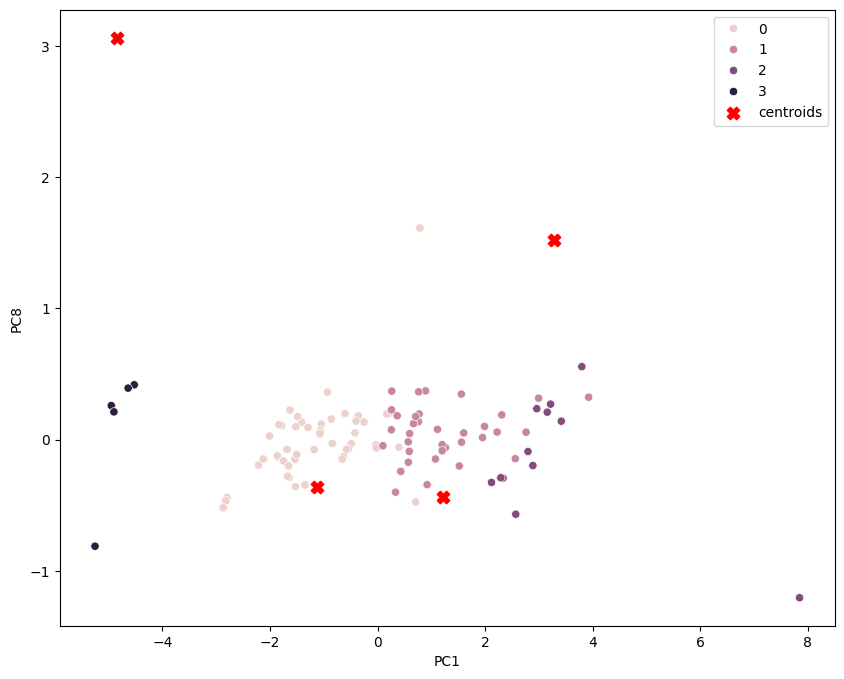

In [38]:
#Visulazing clusters
sns.scatterplot(data=data_pca, x="PC1", y="PC8", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## Linear Regression

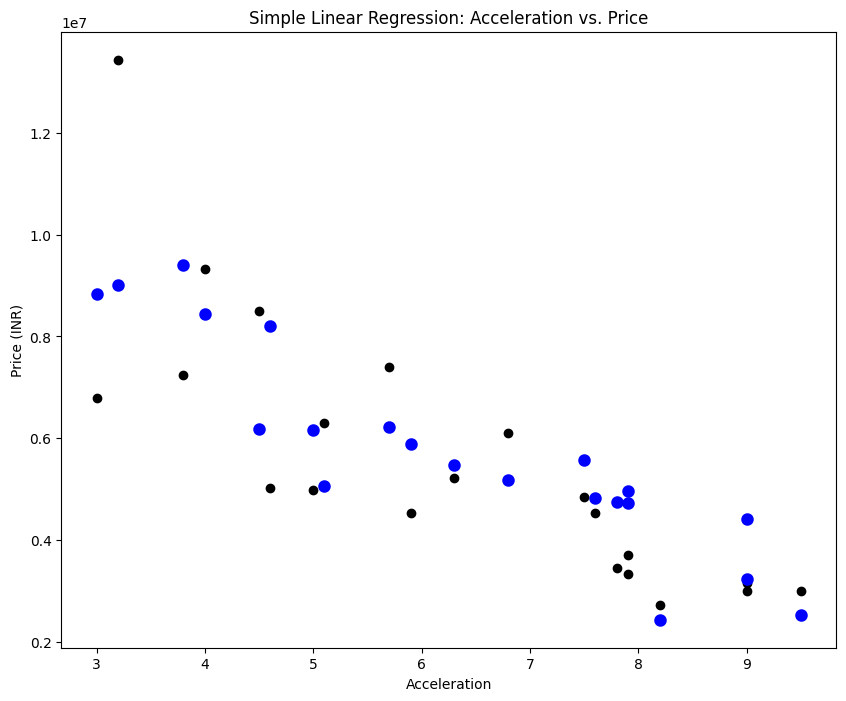

R-squared: 56.16189539487741


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Accel', 'TopSpeed', 'Range']]  # Features
y = df['PriceINR']  # Target

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)

plt.scatter(X_test['Accel'], y_test, color='black')
plt.scatter(X_test['Accel'], y_pred, color='blue', linewidth=3)
plt.xlabel('Acceleration')
plt.ylabel('Price (INR)')
plt.title('Simple Linear Regression: Acceleration vs. Price')
plt.show()

print(f'R-squared: {r2*100}')


## DBScan Clustering

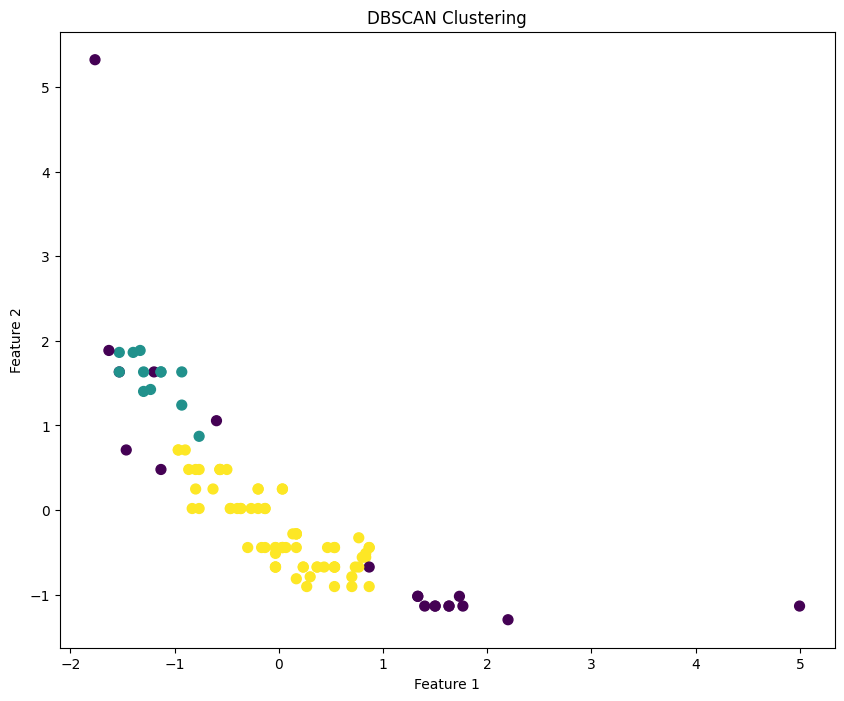

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
